In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np

def get_nps(trials_dir):
    dind_trials = [str_ for str_ in os.listdir(trials_dir) if str_[:5]=="trial"]
    dind_trials = sorted(dind_trials, key=lambda x: int(x.split('_')[-1]))
    dind_dfs = [pd.read_csv(trials_dir/dind_trial/"fitness.csv") for dind_trial in dind_trials]
    dind_nps = [df["team_fitness_aggregated"].to_numpy() for df in dind_dfs]
    return dind_nps

def get_stats(nps):
    # First index is the trial number. Axis 0
    # Second index is the fitness at the generation. Axis 1
    arr = np.array(nps)

    avg = np.average(arr, axis=0)
    dev = np.std(arr, axis=0)
    err = dev/arr.shape[0]
    return avg, dev, err

def plot_stats(avg, err, color):
    plt.plot(avg, color=color)
    plt.fill_between(np.arange(avg.shape[0]), avg+err, avg-err, alpha=0.1, color=color)

def process_trials(trials_dir, color):
    nps = get_nps(trials_dir)
    avg, dev, err = get_stats(nps)
    plot_stats(avg, err, color)

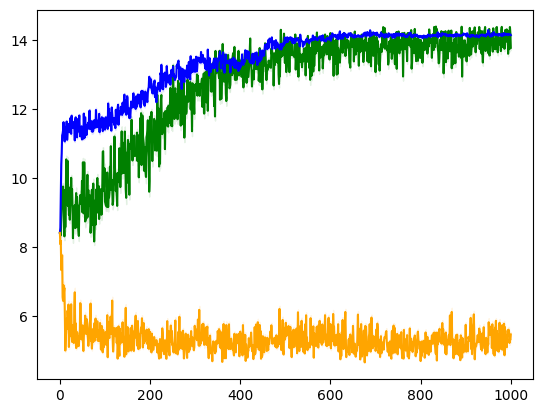

In [2]:
root_dir = Path(os.path.expanduser("~/influence-multi-objective/results/captain_c/include_elites/no_fitness_bias"))
dindirect_dir = root_dir/"D-Indirect"
g_dir = root_dir/"G"
d_dir = root_dir/"D"
process_trials(dindirect_dir, color='green')
process_trials(g_dir, color='blue')
process_trials(d_dir, color='orange')

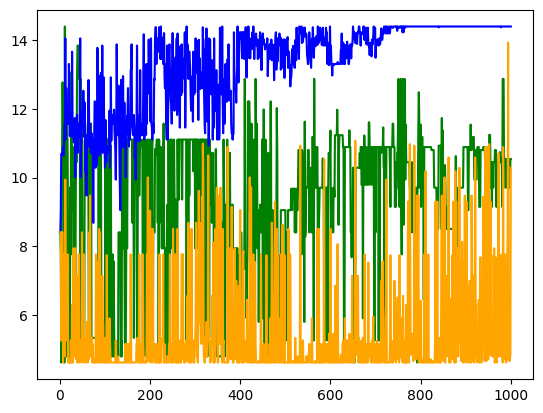

In [7]:
root_dir = Path(os.path.expanduser("~/influence-multi-objective/results/captain_c/dont_include_elites/"))
dindirect_dir = root_dir/"D-Indirect"
g_dir = root_dir/"G"
d_dir = root_dir/"D"
process_trials(dindirect_dir, color='green')
process_trials(g_dir, color='blue')
process_trials(d_dir, color='orange')